In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
import sklearn.svm
import sklearn.metrics
import sklearn.linear_model
import sklearn.ensemble

In [3]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_train, df_test = sklearn.model_selection.train_test_split(df)
print(f'Df size: {df.shape}')
print(f'Df_Train size: {df_train.shape}')
print(f'Df_Test size: {df_test.shape}')

Df size: (891, 12)
Df_Train size: (668, 12)
Df_Test size: (223, 12)


In [7]:
print(df_train.dtypes)
print(df_test.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
df_train['Cabin'].unique()

array([nan, 'E31', 'C65', 'E17', 'E101', 'C93', 'E49', 'B5', 'C101',
       'A34', 'B96 B98', 'B18', 'C2', 'E12', 'C83', 'C23 C25 C27', 'C92',
       'C87', 'F2', 'C126', 'C70', 'E63', 'D49', 'F G63', 'B35', 'A36',
       'F E69', 'C54', 'A19', 'A23', 'E58', 'G6', 'C68', 'E24', 'F33',
       'E44', 'B51 B53 B55', 'A32', 'D35', 'C110', 'D45',
       'B57 B59 B63 B66', 'C52', 'C22 C26', 'B41', 'E33', 'E50', 'A16',
       'C104', 'C124', 'C123', 'B101', 'D7', 'C62 C64', 'E67', 'B77',
       'B28', 'B20', 'D', 'C82', 'D50', 'B94', 'E121', 'C106', 'F4',
       'B58 B60', 'B3', 'D36', 'D48', 'B39', 'C148', 'B71', 'B49', 'E38',
       'D21', 'D47', 'B80', 'A5', 'D6', 'C7', 'D11', 'C95', 'D20', 'E34',
       'C86', 'C32', 'D56', 'D37', 'C118', 'C78', 'T', 'E25', 'B50',
       'C46', 'D26', 'C125', 'C103', 'E68', 'B38', 'A14', 'A24', 'C50',
       'D30', 'D19', 'B86', 'A10', 'E8', 'D17', 'A7'], dtype=object)

In [9]:
df_train = df_train.drop('Cabin', axis = 1)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,S
794,795,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,S
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,S
422,423,0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,S
...,...,...,...,...,...,...,...,...,...,...,...
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,S
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,S


In [10]:
df_train['Age'].mean()

29.38060773480663

In [11]:
df_train['Age'] = df_train['Age'].fillna(value = df_train['Age'].mean())

In [12]:
df_train = df_train.drop(['Name'], axis = 1)
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
240,241,0,3,female,29.380608,1,0,2665,14.4542,C
115,116,0,3,male,21.000000,0,0,STON/O 2. 3101294,7.9250,S
794,795,0,3,male,25.000000,0,0,349203,7.8958,S
92,93,0,1,male,46.000000,1,0,W.E.P. 5734,61.1750,S
422,423,0,3,male,29.000000,0,0,315082,7.8750,S
...,...,...,...,...,...,...,...,...,...,...
100,101,0,3,female,28.000000,0,0,349245,7.8958,S
862,863,1,1,female,48.000000,0,0,17466,25.9292,S
509,510,1,3,male,26.000000,0,0,1601,56.4958,S
134,135,0,2,male,25.000000,0,0,C.A. 29178,13.0000,S


In [13]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [20]:
df_train[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.030648,-0.038400,0.026373,-0.033320,-0.006968,0.040536
Survived,0.030648,1.000000,-0.338666,-0.101383,-0.044259,0.092635,0.258124
Pclass,-0.038400,-0.338666,1.000000,-0.305636,0.078315,0.027699,-0.551031
Age,0.026373,-0.101383,-0.305636,1.000000,-0.197579,-0.164818,0.088879
SibSp,-0.033320,-0.044259,0.078315,-0.197579,1.000000,0.403345,0.178853
Parch,-0.006968,0.092635,0.027699,-0.164818,0.403345,1.000000,0.234948
Fare,0.040536,0.258124,-0.551031,0.088879,0.178853,0.234948,1.000000


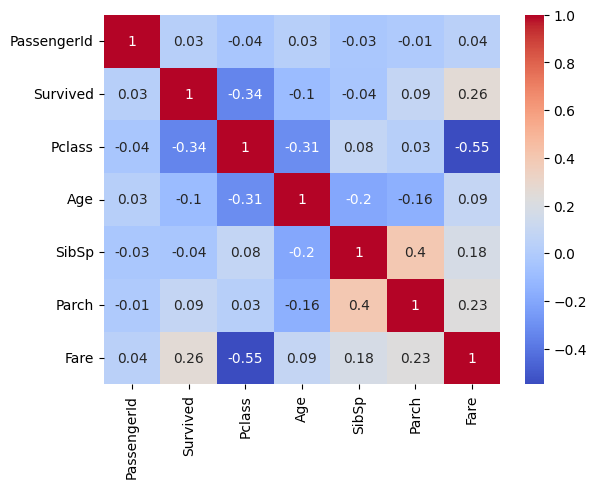

In [31]:
sns.heatmap(df_train[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']].corr().round(2),annot = True, cmap = 'coolwarm')
# cmap color list: find it on this [link](https://seaborn.pydata.org/tutorial/color_palettes.html)
plt.show()

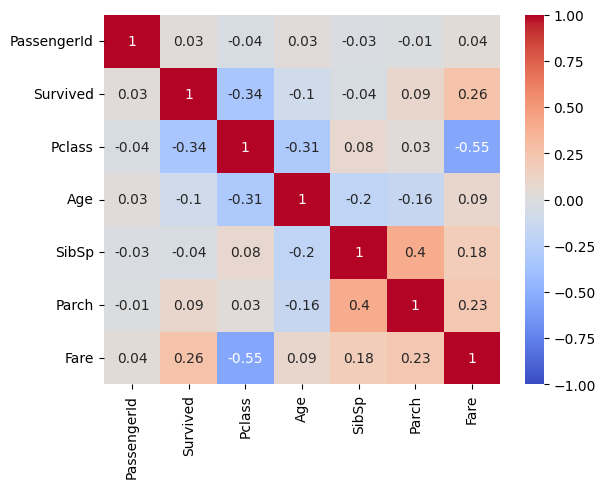

In [30]:
sns.heatmap(df_train[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']].corr().round(2),annot = True, vmax = 1, vmin = -1, center = 0, cmap = 'coolwarm')
# cmap color list: find it on this [link](https://seaborn.pydata.org/tutorial/color_palettes.html)
plt.show()

In [21]:
df_train['Embarked'] = df_train['Embarked'].fillna(value = 'S')

Pclass
3    371
1    158
2    139
Name: count, dtype: int64


<Axes: xlabel='Pclass'>

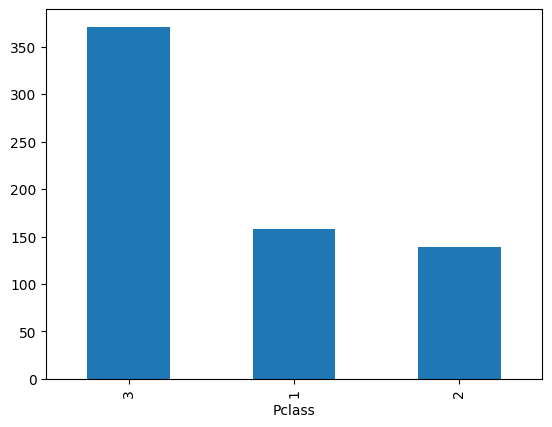

In [22]:
print(df_train['Pclass'].value_counts())
df_train['Pclass'].value_counts().plot(kind = 'bar')

In [23]:
df_train[['Pclass','Survived']].value_counts()

Pclass  Survived
3       0           282
1       1            99
3       1            89
2       0            72
        1            67
1       0            59
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


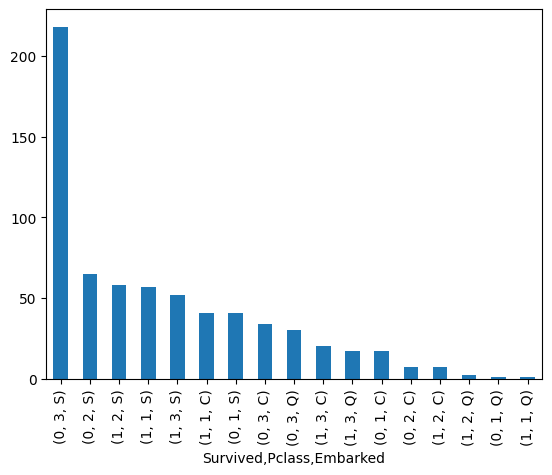

In [24]:
print(df_train[['Survived','Pclass','Embarked']].value_counts().plot(kind = 'bar'))

In [15]:
display(df_train[['Survived','Embarked']].groupby('Embarked').mean())
print(16*'#')
display(df_train[['Survived','Embarked']].groupby('Embarked').sum())
print(f'Out of {len(df_train["PassengerId"])} Passengers, only {df_train["Survived"].sum()} Survived')

,Survived
Embarked,
C,0.537190
Q,0.384615
S,0.335354


################


,Survived
Embarked,
C,65
Q,20
S,166


Out of 668 Passengers, only 251 Survived


In [16]:
display(df_train[['Pclass','Survived']].groupby('Pclass').mean())
print(16*'#')
display(df_train[['Pclass','Survived']].groupby('Pclass').sum())
print(f'Out of {len(df_train["PassengerId"])} Passengers, only {df_train["Survived"].sum()} Survived')

,Survived
Pclass,
1,0.629630
2,0.469697
3,0.232620


################


,Survived
Pclass,
1,102
2,62
3,87


Out of 668 Passengers, only 251 Survived


In [17]:
display(df_train[['Sex','Survived']].groupby('Sex').mean())
print(16*'#')
display(df_train[['Sex','Survived']].groupby('Sex').sum())


,Survived
Sex,
female,0.725738
male,0.183295


################


,Survived
Sex,
female,172
male,79


In [18]:
df_test['Embarked']= df_test['Embarked'].fillna(value = 'S')
df_test['Age']= df_test['Age'].fillna(value = df_test['Age'].mean())

In [19]:
df_train['Parch'].value_counts()

Parch
0    504
1     90
2     61
5      5
4      4
3      3
6      1
Name: count, dtype: int64

In [20]:
# x_train = df_train[['Embarked','Parch','SibSp']]
# y_train = df_train['Survived']

# x_test = df_test[['Embarked','Parch','SibSp']]
# y_test = df_test['Survived']


x_train = df_train[['Pclass','Embarked','Sex']]
y_train = df_train['Survived']

x_test = df_test[['Pclass','Embarked','Sex']]
y_test = df_test['Survived']

###############

print ('x_train size: ', x_train.shape)
print ('y_train size: ', y_train.shape)
print ('x_test size: ', x_test.shape)
print ('y_test size: ', y_test.shape)

x_train size:  (668, 3)
y_train size:  (668,)
x_test size:  (223, 3)
y_test size:  (223,)


In [21]:
x_test.isna().sum()

Pclass      0
Embarked    0
Sex         0
dtype: int64

In [22]:
numerical_attributes = x_train.select_dtypes(include = ['int64','float64']).columns.tolist()
categorical_attributes = x_train.select_dtypes(include = ['object']).columns.tolist()

ct = sklearn.compose.ColumnTransformer([
    ('standard_scaling', sklearn.preprocessing.StandardScaler(), numerical_attributes),
    ('one_hot_encoding', sklearn.preprocessing.OneHotEncoder(handle_unknown = 'ignore'), categorical_attributes)
])

#######################################

ct.fit(x_train)
x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

print ('x_train size: ', x_train.shape)
print ('y_train size: ', y_train.shape)
print ('x_test size: ', x_test.shape)
print ('y_test size: ', y_test.shape)

x_train size:  (668, 6)
y_train size:  (668,)
x_test size:  (223, 6)
y_test size:  (223,)


In [23]:
modelSVC = sklearn.svm.SVC()
resultSVC = modelSVC.fit(x_train, y_train)

modelLR = sklearn.linear_model.LogisticRegression()
resultLR = modelLR.fit(x_train, y_train)

modelRFC = sklearn.ensemble.RandomForestClassifier(n_estimators = 100, random_state = None, bootstrap = True)
resultRFC = modelRFC.fit(x_train, y_train)

modelGB = sklearn.ensemble.GradientBoostingClassifier(n_estimators = 100, random_state = None)
resultGB = modelGB.fit(x_train, y_train)

In [24]:
y_predictedSVC = modelSVC.predict(x_test)
y_predictedLR = modelLR.predict(x_test)
y_predictedRFC = modelRFC.predict(x_test)
y_predictedGB = modelGB.predict(x_test)

In [25]:
accuracySVC = sklearn.metrics.accuracy_score(y_test, y_predictedSVC)
print(f'SVC Accuracy score: {accuracySVC}')

accuracyLR = sklearn.metrics.accuracy_score(y_test, y_predictedLR)
print(f'LR Accuracy score: {accuracyLR}')

accuracyRFC = sklearn.metrics.accuracy_score(y_test, y_predictedRFC)
print(f'SVC Accuracy score: {accuracyRFC}')

accuracyGB = sklearn.metrics.accuracy_score(y_test, y_predictedGB)
print(f'GB Accuracy score: {accuracyGB}')

SVC Accuracy score: 0.8116591928251121
LR Accuracy score: 0.7802690582959642
SVC Accuracy score: 0.8116591928251121
GB Accuracy score: 0.8116591928251121


In [26]:
from tabulate import tabulate

In [27]:
y_predictedSVC = modelSVC.predict(x_test)
# print(y_predictedSVC)

y_predictedLR = modelLR.predict(x_test)
# print(y_predictedLR)

y_predictedRFC = modelRFC.predict(x_test)
# print(y_predictedSVC)

y_predictedGB = modelGB.predict(x_test)
# print(y_predictedLR)

############################################

Passenger = range(1, 224)
table = zip(Passenger, y_predictedSVC, y_predictedLR, y_predictedRFC, y_predictedGB, y_test)

print(tabulate(table, headers = ["Passengers",'SVC Survived','LR Survived','RFC Survived','GB Survived','Test Survived']))

  Passengers    SVC Survived    LR Survived    RFC Survived    GB Survived    Test Survived
------------  --------------  -------------  --------------  -------------  ---------------
           1               1              1               1              1                1
           2               0              0               0              0                0
           3               0              0               0              0                0
           4               0              0               0              0                0
           5               1              1               1              1                1
           6               1              1               1              1                1
           7               0              0               0              0                0
           8               0              0               0              0                0
           9               0              0               0              0      

## Now I'll try with the test Dataset which doesn't have the 'Survived' column

In [28]:
df_real = pd.read_csv('test.csv')
df_real

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [29]:
df_real.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
df_real['Embarked'] = df_real['Embarked'].fillna(value = 'S')
df_real.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [31]:
df_real = df_real.drop(['Name','Age','Fare','Cabin'], axis = 1)

In [32]:
df_real.isna().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

In [33]:
x_real = df_real[['Pclass','Embarked','Sex','Parch','SibSp']]

In [34]:
x_real = ct.transform(x_real)

print ('x_train size: ', x_train.shape)
print ('x_real size: ', x_real.shape)

x_train size:  (668, 6)
x_real size:  (418, 6)


In [35]:
y_predictedSVC = modelSVC.predict(x_real)
# print(y_predictedSVC)

y_predictedLR = modelLR.predict(x_real)
# print(y_predictedLR)

y_predictedRFC = modelRFC.predict(x_real)


y_predictedGB = modelGB.predict(x_real)


############################################

PassengerId = range(892, 1310)
# table = zip(PassengerId, y_predictedLR, y_predictedSVC)
table_1 = zip(PassengerId, y_predictedRFC)
# print(tabulate(table, headers = ["Passenger",'SVC Survived','LR Survived']))
print(tabulate(table_1, headers = ["Passenger","Survived"], tablefmt = "fancy_grid"))

╒═════════════╤════════════╕
│   Passenger │   Survived │
╞═════════════╪════════════╡
│         892 │          0 │
├─────────────┼────────────┤
│         893 │          0 │
├─────────────┼────────────┤
│         894 │          0 │
├─────────────┼────────────┤
│         895 │          0 │
├─────────────┼────────────┤
│         896 │          0 │
├─────────────┼────────────┤
│         897 │          0 │
├─────────────┼────────────┤
│         898 │          1 │
├─────────────┼────────────┤
│         899 │          0 │
├─────────────┼────────────┤
│         900 │          1 │
├─────────────┼────────────┤
│         901 │          0 │
├─────────────┼────────────┤
│         902 │          0 │
├─────────────┼────────────┤
│         903 │          0 │
├─────────────┼────────────┤
│         904 │          1 │
├─────────────┼────────────┤
│         905 │          0 │
├─────────────┼────────────┤
│         906 │          1 │
├─────────────┼────────────┤
│         907 │          1 │
├─────────────

In [36]:
df_final = pd.DataFrame({'PassengerId':PassengerId,'Survived':y_predictedRFC})
type(df_final)
df_final.to_csv('submission.csv', index = False)

In [37]:
pd.read_csv('submission.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
